In [ ]:
!pip install pydsm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.6/552.6 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydsm: filename=pydsm-0.14.0.0-cp310-cp310-linux_x86_64.whl size=809451 sha256=bb31396d3507cccf5c418b557566bc40b9401baf6d320aa8c8d823d93034d2db
  Stored in directory: /root/.cache/pip/wheels/05/d9/bf/d407050d7f16ae0d20a168f3dca2432bb63eabe6796346a9c9
Successfully built pydsm


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# импортируем библиотечные функции -- прямое и обратное быстрое преобразование Фурье
from scipy.fft import fft, ifft
import pydsm

In [ ]:
N = 32
m0 = 10
m1 = 0.85

In [ ]:
k = np.array(range(N))
n = np.array(range(N))
x_k = np.sin(2*math.pi / N * m0 * k) + np.sin(2*math.pi / N * (m0+0.25) * k)

## Task 3.1

In [ ]:
# ДВПФ для заданной последовательности (функция от nu)
X = pydsm.ft.dtft(x_k)
nu_range = np.linspace(0, 1, 1000)
X_abs_range = np.array([abs(X(nu)) for nu in nu_range])

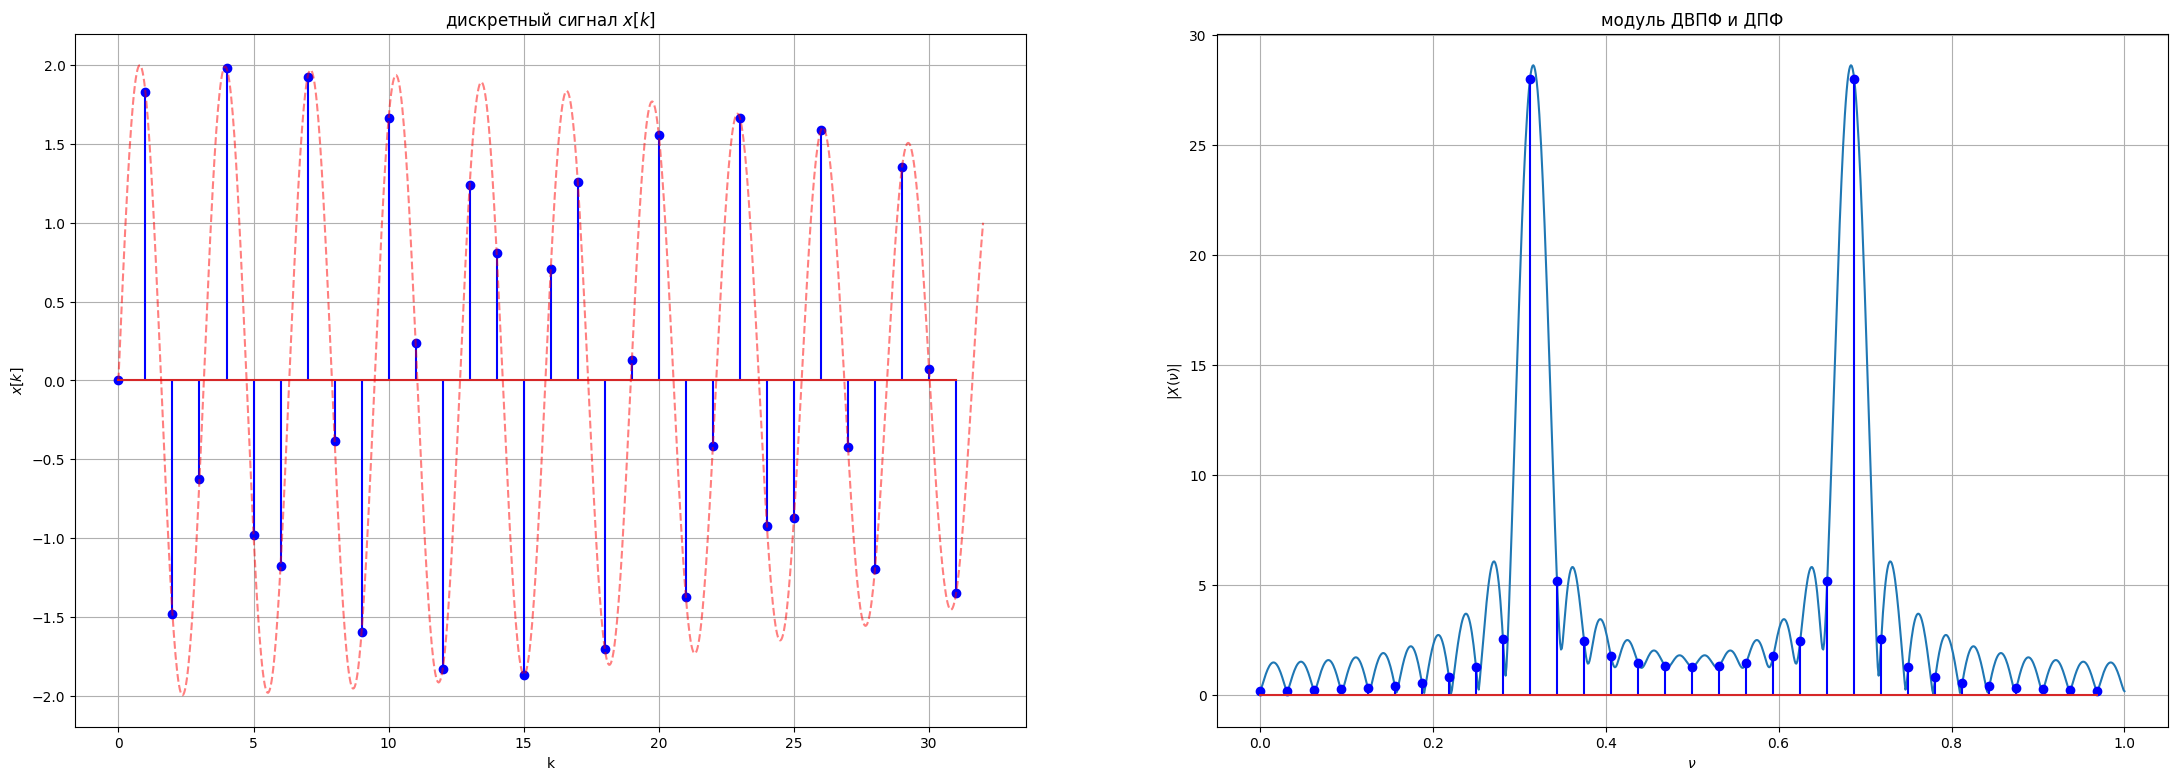

In [ ]:
plt.figure(figsize=(27, 9))

plt.subplot(1, 2, 1)
plt.stem(k, x_k, 'b', markerfmt='bo')

plt.title(r'дискретный сигнал $x[k]$')
plt.xlabel('k')
plt.ylabel(r'$x[k]$')
# ============================================================================================
k_range = np.linspace(0, N, 1000)
x_k_range = np.sin(2*math.pi / N * m0 * k_range) + np.sin(2*math.pi / N * (m0+0.25) * k_range)
plt.plot(k_range, x_k_range, color='red', alpha=0.5, lw=1.5, ls='--')
# ============================================================================================
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(nu_range, X_abs_range)
plt.title(r'модуль ДВПФ и ДПФ')
plt.ylabel(r'$|X(\nu)|$')
plt.xlabel(r'$\nu$')

plt.stem(n/N, abs(fft(x_k)), 'b', markerfmt='bo')
plt.grid()

In [ ]:
# расширим дискретный сигнал нулевыми отсчетами
M = 50
x_k = np.sin(2*math.pi / N * m0 * k) + np.sin(2*math.pi / N * (m0+0.25) * k)
x_k = np.concatenate((x_k, np.zeros(M)), None)

# ДВПФ для заданной последовательности (функция от nu)
X = pydsm.ft.dtft(x_k)
nu_range = np.linspace(0, 1, 1000)
X_abs_range = np.array([abs(X(nu)) for nu in nu_range])

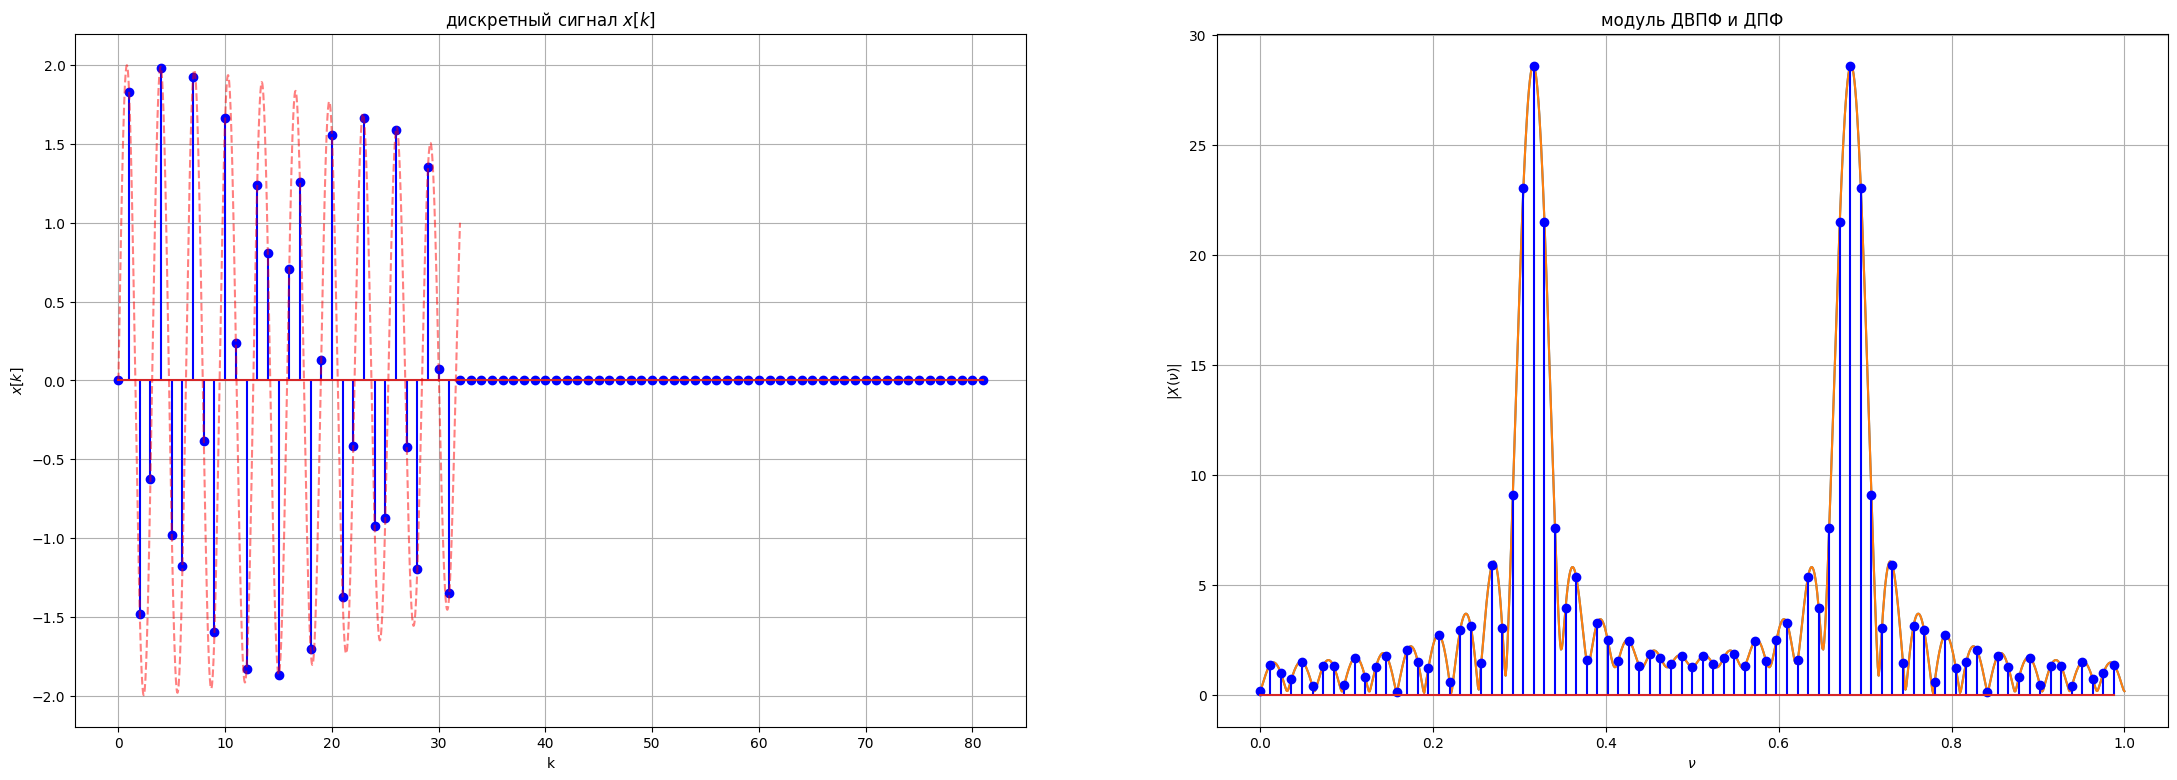

In [ ]:
plt.figure(figsize=(27, 9))

plt.subplot(1, 2, 1)
plt.stem(np.array(range(N+M)), x_k, 'b', markerfmt='bo')
plt.title(r'дискретный сигнал $x[k]$')
plt.xlabel('k')
plt.ylabel(r'$x[k]$')
# ============================================================================================
k_range = np.linspace(0, N, 1000)
x_k_range = np.sin(2*math.pi / N * m0 * k_range) + np.sin(2*math.pi / N * (m0+0.25) * k_range)
plt.plot(k_range, x_k_range, color='red', alpha=0.5, lw=1.5, ls='--')
# ============================================================================================
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(nu_range, X_abs_range)
plt.plot(nu_range, X_abs_range)
plt.title(r'модуль ДВПФ и ДПФ')
plt.ylabel(r'$|X(\nu)|$')
plt.xlabel(r'$\nu$')

plt.stem(np.array(range(M+N))/(N+M), abs(fft(x_k)), 'b', markerfmt='bo')
plt.grid()

Заметим, что исходный дискретный сигнал не поменялся, так как мы всего лишь добавили некоторое количество нулевых отсчетов. Соответственно, не поменялось ДВПФ, при этом точность ДПФ повысилось.

# Task 3.2

In [ ]:
m0 = 10
m1 = 0.85
N = 32

Дискретное преобразование Фурье для переодической последовательности $x[k]$:
$$\tilde{X}[n] = \frac{1}{N} \sum \limits_{k=0}^{N-1} x[k] \exp \left(-j \frac{2 \pi}{N} n k \right)$$
Данное преобразование определяет $N$-точечное преобразование Фурье переодической функции, на одном периоде.

Построим графики для действительной и мнимой частей переодического сигнала
$$x[k] = \cos \left(\frac{2 \pi}{N} m k \right) + \sin \left(\frac{2 \pi}{N} m k \right)$$
где $m$ -- константа

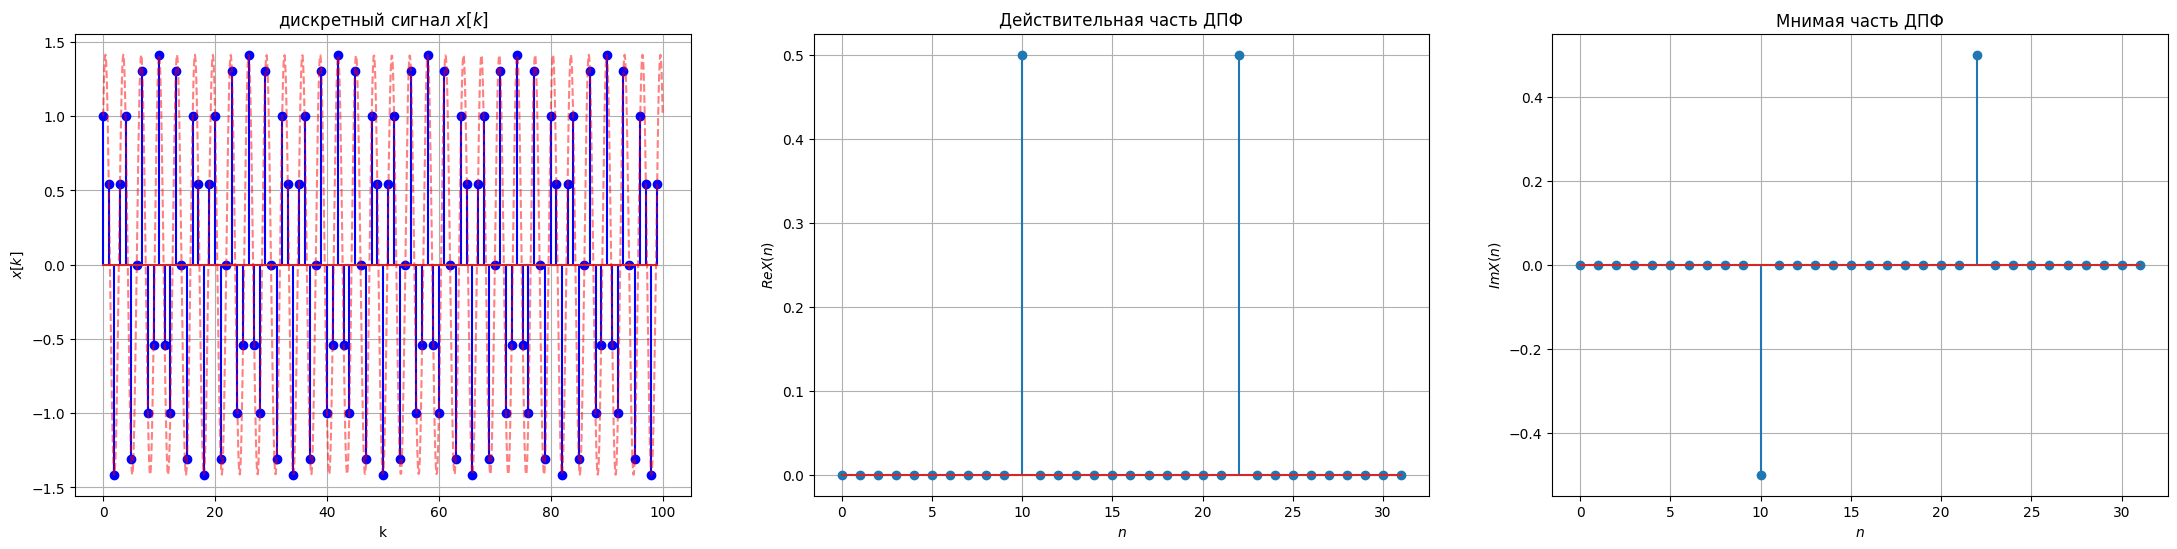

In [ ]:
rg = 100

k = np.arange(rg)
m = m0
x_k = np.cos(2*math.pi*m*k / N) + np.sin(2*math.pi*m*k / N)

plt.figure(figsize=(27, 6))

plt.subplot(1, 3, 1)
plt.stem(k, x_k, 'b', markerfmt='bo')
plt.title(r'дискретный сигнал $x[k]$')
plt.xlabel('k')
plt.ylabel(r'$x[k]$')
# ============================================================================================
k_range = np.linspace(0,rg, 1000)
x_k_range = np.cos(2*math.pi*m*k_range / N) + np.sin(2*math.pi*m*k_range / N)
plt.plot(k_range, x_k_range, color='red', alpha=0.5, lw=1.5, ls='--')
# ============================================================================================
plt.grid()

# вычислим значения ДПФ на одном периоде
X = np.array([1/N * np.dot(x_k[:N], np.exp(-1j*2*math.pi*k[:N]*n / N)) for n in range(N)])

plt.subplot(1, 3, 2)
plt.stem(np.arange(N), X.real)
plt.title(r'Действительная часть ДПФ')
plt.ylabel(r'$Re X(n)$')
plt.xlabel(r'$n$')
plt.grid()

plt.subplot(1, 3, 3)
plt.stem(np.arange(N), X.imag)
plt.title(r'Мнимая часть ДПФ')
plt.ylabel(r'$Im X(n)$')
plt.xlabel(r'$n$')
plt.grid()

Найдем теоретическое выражение для ДВПФ и соответственно для ДПФ
$$x[k] = \cos \left(\frac{2 \pi}{N} m k \right) + \sin \left(\frac{2 \pi}{N} m k \right)$$

$$x[k] = \frac{\exp \left(j \frac{2 \pi}{N} m k \right) + \exp \left(-j \frac{2 \pi}{N} m k \right)}{2} + \frac{\exp \left(j \frac{2 \pi}{N} m k \right) - \exp \left(-j \frac{2 \pi}{N} m k \right)}{2 j}$$


Выражение для ДВПФ

$$X(\nu) = \sum \limits_{- ∞}^{∞} x[k] \exp(-j 2 \pi \nu k)$$

тогда

$$Re X(\nu) = \sum \limits_{- ∞}^{∞} \frac{1}{2} δ \left(\nu - \frac{m}{N} - n \right) + \frac{1}{2} δ \left(\nu + \frac{m}{N} - n \right)$$

$$Im X(\nu) = \sum \limits_{- ∞}^{∞} \frac{1}{2} δ \left(\nu - \frac{m}{N} - n \right) - \frac{1}{2} δ \left(\nu + \frac{m}{N} - n \right)$$

Соответственно, для получения ДПФ, рассматриваем период $\nu \in [0, 1]$. Тогда, ДПФ будет представлять собой 2 дельта-функции на частотах $\nu_1 = \frac{m}{N}$ и $\nu_2 = 1 - \frac{m}{N}$.

Построим ДПФ с помощью библиотечных функций и сравним с полученнным результатом

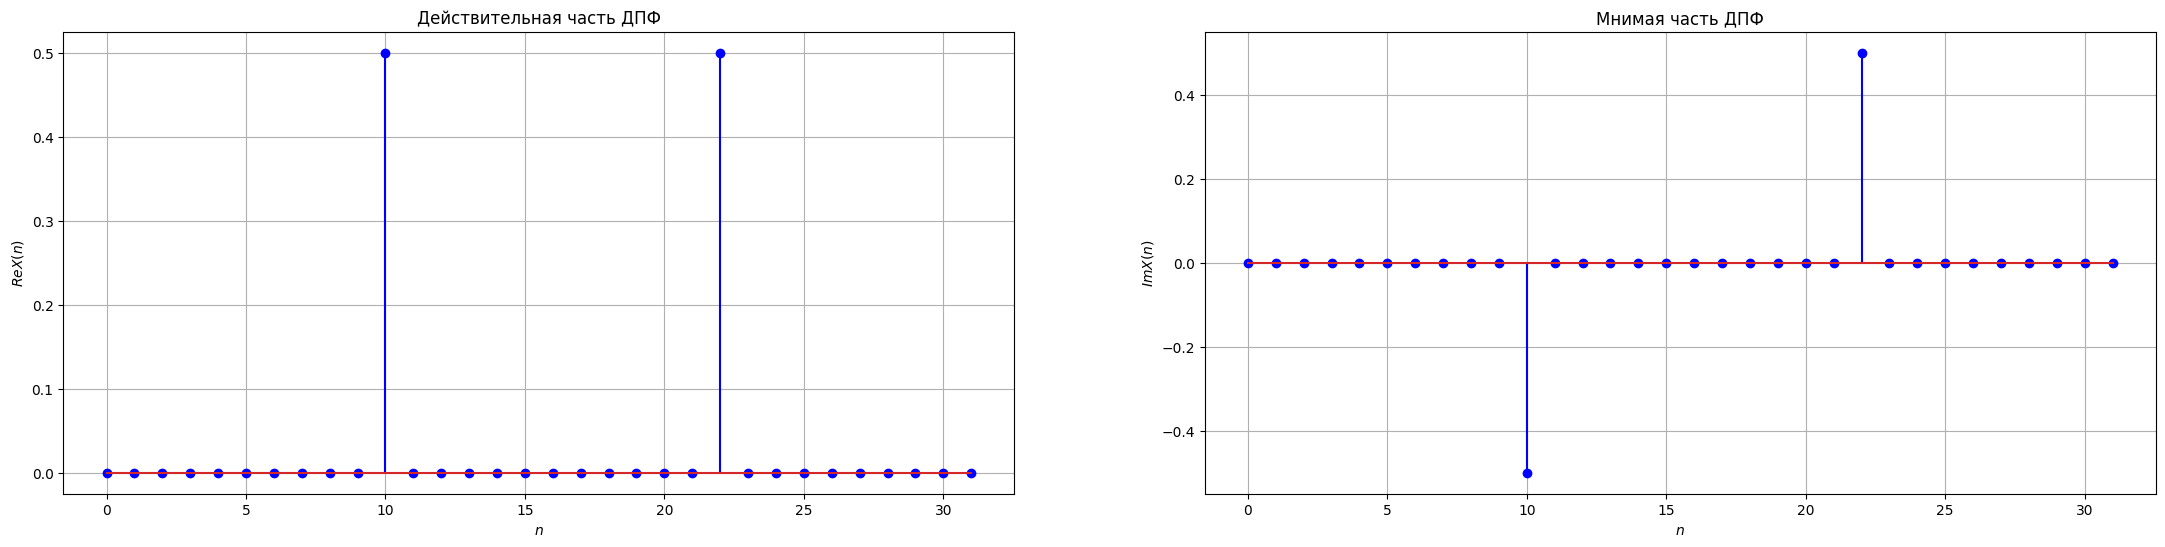

In [ ]:
plt.figure(figsize=(27, 6))

plt.subplot(1, 2, 1)
plt.stem(np.arange(N), 1/N*fft(x_k[:N]).real, 'b', markerfmt='bo')
plt.title(r'Действительная часть ДПФ')
plt.ylabel(r'$Re X(n)$')
plt.xlabel(r'$n$')
plt.grid()

plt.subplot(1, 2, 2)
plt.stem(np.arange(N), 1/N*fft(x_k[:N]).imag, 'b', markerfmt='bo')
plt.title(r'Мнимая часть ДПФ')
plt.ylabel(r'$Im X(n)$')
plt.xlabel(r'$n$')
plt.grid()

Построим те же графики для другого значения $m$

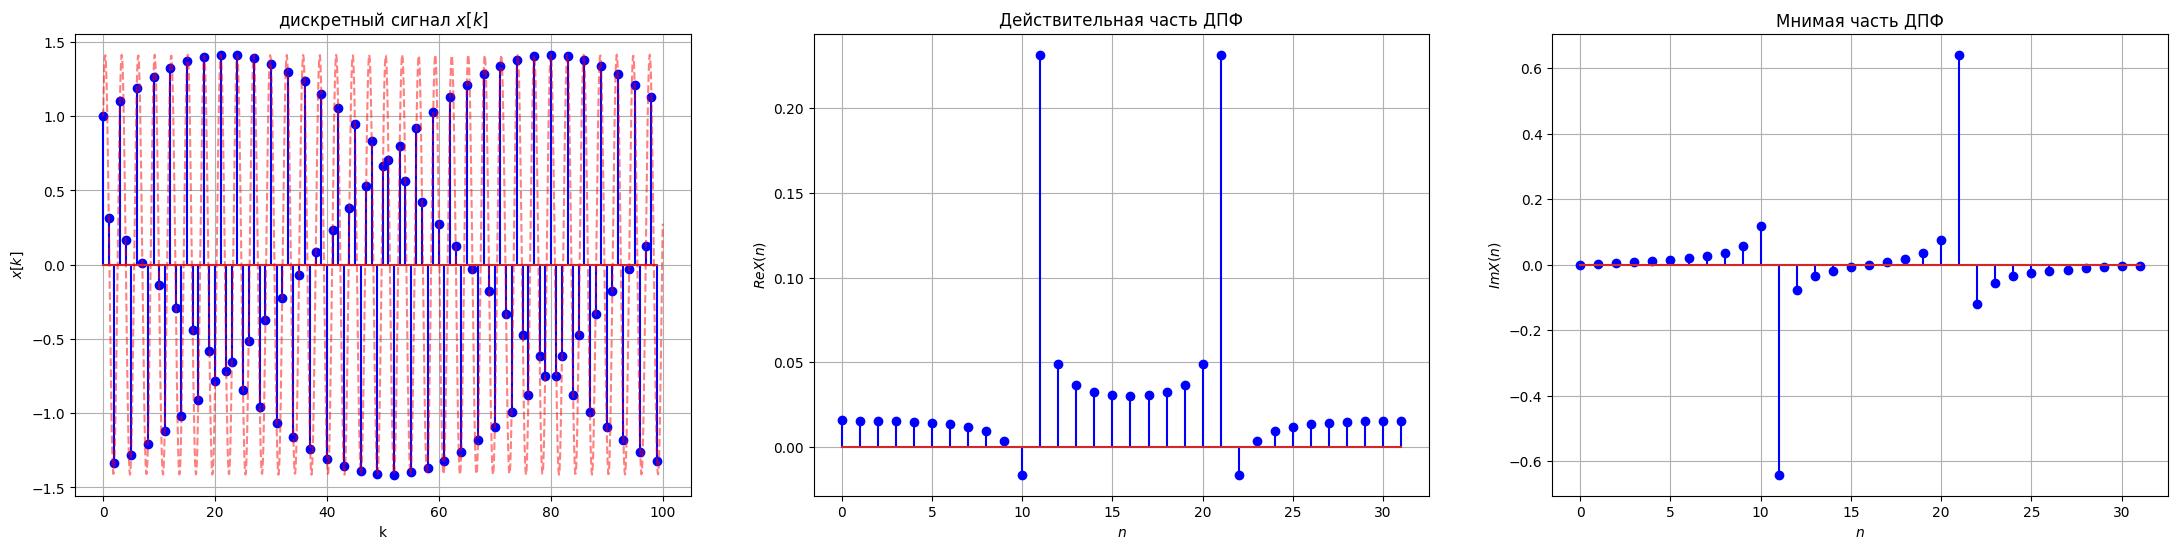

In [ ]:
rg = 100

k = np.arange(rg)
m = m0 + m1
x_k = np.cos(2*math.pi*m*k / N) + np.sin(2*math.pi*m*k / N)

plt.figure(figsize=(27, 6))

plt.subplot(1, 3, 1)
plt.stem(k, x_k, 'b', markerfmt='bo')
plt.title(r'дискретный сигнал $x[k]$')
plt.xlabel('k')
plt.ylabel(r'$x[k]$')
# ============================================================================================
k_range = np.linspace(0,rg, 1000)
x_k_range = np.cos(2*math.pi*m*k_range / N) + np.sin(2*math.pi*m*k_range / N)
plt.plot(k_range, x_k_range, color='red', alpha=0.5, lw=1.5, ls='--')
# ============================================================================================
plt.grid()

plt.subplot(1, 3, 2)
plt.stem(np.arange(N), 1/N*fft(x_k[:N]).real, 'b', markerfmt='bo')
plt.title(r'Действительная часть ДПФ')
plt.ylabel(r'$Re X(n)$')
plt.xlabel(r'$n$')
plt.grid()

plt.subplot(1, 3, 3)
plt.stem(np.arange(N), 1/N*fft(x_k[:N]).imag, 'b', markerfmt='bo')
plt.title(r'Мнимая часть ДПФ')
plt.ylabel(r'$Im X(n)$')
plt.xlabel(r'$n$')
plt.grid()

Как мы видим, в данном случае, спектр уже не представлен двумя $\delta$-функциями. Здесь начинает играть роль свойство симметрии $X[n] = X[N-n]$.